In [1]:
from numpy import *
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1
import numpy.linalg as np
from scipy.stats.stats import pearsonr

In [3]:
def kernel(point,xmat, k):
 m,n = np1.shape(xmat)
 weights = np1.mat(np1.eye((m)))
 for j in range(m):
    diff = point - X[j]
    weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
 return weights

In [3]:
def localWeight(point,xmat,ymat,k):
 wei = kernel(point,xmat,k)
 W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
 return W

In [4]:
def localWeightRegression(xmat,ymat,k):
 m,n = np1.shape(xmat)
 ypred = np1.zeros(m)
 for i in range(m):
    ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
 return ypred

In [7]:
# load data points
data = pd.read_csv('tips.csv')
print(data)
bill = np1.array(data.total_bill)
tip = np1.array(data.tip)



     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [6]:
#preparing and add 1 in bill
mbill = np1.mat(bill)
mtip = np1.mat(tip) # mat is used to convert to n dimesiona to 2 dimensional array form
np1.shape(mbill)[1]
#print(mbill) 
#244 data is stored in m
one = np1.mat(np1.ones(m))
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE
print(X)
#set k here
ypred = localWeightRegression(X,mtip,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

[[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
  15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
  19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
  16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
  28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
  20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
  26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
  15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
  27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
  18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
  11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
  11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
  16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
  48.17 25.   13.39 16.49 21.5  12.66 1

NameError: name 'localWeightRegression' is not defined

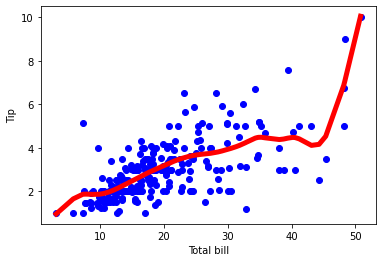

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='blue')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

In [8]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook

In [9]:
def local_regression(x0, X, Y, tau):# add bias term
    x0 = np.r_[1, x0] # Add one to avoid the loss in information
    X = np.c_[np.ones(len(X)), X]
    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau) # XTranspose * W
    beta = np.linalg.pinv(xw @ X) @ xw @ Y #@ Matrix Multiplication or Dot Product
    # predict value
    return x0 @ beta # @ Matrix Multiplication or Dot Product for prediction

In [10]:
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))
# Weight or Radial Kernal Bias Function

In [11]:
n = 1000
# generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])
# jitter X
X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])
domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y :
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-2.95983905 -2.77699311 -3.06439147 -3.15903005 -3.19868861 -3.00406048
 -2.9445708  -2.87933746 -2.94253902]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


In [12]:
def plot_lwr(tau):
# prediction through regression
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plot = figure(plot_width=400, plot_height=400)
    plot.title.text='tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot

In [13]:
show(gridplot([
[plot_lwr(10.), plot_lwr(1.)],
[plot_lwr(0.1), plot_lwr(0.01)]]))